In [32]:
try:
    import sympy as sp
except Exception as e:
    print("Installing SymPy")
    !pip install sympy

import sympy as sp
from sympy import init_printing
import matplotlib.pyplot as plt
import numpy as np

init_printing(use_latex=True)

## Define Logistic Function

In [33]:
x = sp.symbols('x')
logistic = 1 / (1 + sp.exp(-x))

print("Logistic function:")
display(logistic)


Logistic function:


   1   
───────
     -x
1 + ℯ  

In [34]:
from sympy import latex, solve, Eq

n1 = sp.symbols('n1')
n0 = sp.symbols('n0')
pi = sp.symbols('pi')

nall = (-1*(1/(n1+n0)))*(n1*sp.log(pi)+n0*sp.log(1-pi))
nall_deriv = sp.diff(nall, pi)

equation = Eq(nall_deriv, 0)
solution = solve(equation, pi)
display(solution)
print(latex(solution))


⎡  n₁   ⎤
⎢───────⎥
⎣n₀ + n₁⎦

\left[ \frac{n_{1}}{n_{0} + n_{1}}\right]


In [57]:
import torch

def approx_fprime(f, x):
  eps=1e-8
  d = x.shape[0]
  f_i = f(x)
  ret_grad = torch.zeros_like(x)

  for i in range(d):
    theta_i = x.clone()
    theta_i[i] = theta_i[i] + eps

    f_theta_i = f(theta_i)

    ret_grad[i] = (f_theta_i - f_i) / eps

  return ret_grad

def sum_of_squares(x):
    return torch.sum(x**2)

def autodiff(x):
    x_grad = x.clone().detach().requires_grad_(True)
    out = sum_of_squares(x_grad)
    out.backward()
    return x_grad.grad

def abs_difference(x1, x2):
    arr = []
    for i in range(len(x1)):
      arr.append(abs(x1[i] - x2[i]))
    return arr

x1 = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float64)
x1_app = approx_fprime(sum_of_squares,x1)
x1_aut = autodiff(x1)

x2 = torch.tensor([2.0, 4.0], dtype=torch.float64)
x2_app = approx_fprime(sum_of_squares,x2)
x2_aut = autodiff(x2)

x3 = torch.tensor([2.0, 4.0, 5.0, 9.0, 10.0, 11.0], dtype=torch.float64)
x3_app = approx_fprime(sum_of_squares,x3)
x3_aut = autodiff(x3)

print("x value:", x1)
print("gradient at x with approx_fprime", x1_app)
print("gradient at x with autodiff", x1_aut)
print("absolute difference", abs_difference(x1_app, x1_aut))

print("\nx value:", x2)
print("gradient at x with approx_fprime", x2_app)
print("gradient at x with autodiff", x2_aut)
print("absolute difference", abs_difference(x2_app, x2_aut))

print("\nx value:", x3)
print("gradient at x with approx_fprime", x3_app)
print("gradient at x with autodiff", x3_aut)
print("absolute difference", abs_difference(x3_app, x3_aut))


x value: tensor([1., 2., 3.], dtype=torch.float64)
gradient at x with approx_fprime tensor([2.0000, 4.0000, 6.0000], dtype=torch.float64)
gradient at x with autodiff tensor([2., 4., 6.], dtype=torch.float64)
absolute difference [tensor(1.2155e-08, dtype=torch.float64), tensor(2.4310e-08, dtype=torch.float64), tensor(3.6465e-08, dtype=torch.float64)]

x value: tensor([2., 4.], dtype=torch.float64)
gradient at x with approx_fprime tensor([4.0000, 8.0000], dtype=torch.float64)
gradient at x with autodiff tensor([4., 8.], dtype=torch.float64)
absolute difference [tensor(2.4310e-08, dtype=torch.float64), tensor(4.8620e-08, dtype=torch.float64)]

x value: tensor([ 2.,  4.,  5.,  9., 10., 11.], dtype=torch.float64)
gradient at x with approx_fprime tensor([ 4.0000,  8.0000, 10.0000, 18.0000, 20.0000, 22.0000],
       dtype=torch.float64)
gradient at x with autodiff tensor([ 4.,  8., 10., 18., 20., 22.], dtype=torch.float64)
absolute difference [tensor(3.1731e-06, dtype=torch.float64), tensor(6

## Compute Derivative Function

In [36]:
logistic_deriv = sp.diff(logistic, x)

print("\nLogistic Function Derivative:")
display(logistic_deriv)



Logistic Function Derivative:


    -x    
   ℯ      
──────────
         2
⎛     -x⎞ 
⎝1 + ℯ  ⎠ 

## Plot Results

Text(0.5, 1.0, 'Derivative of Logistic Function')

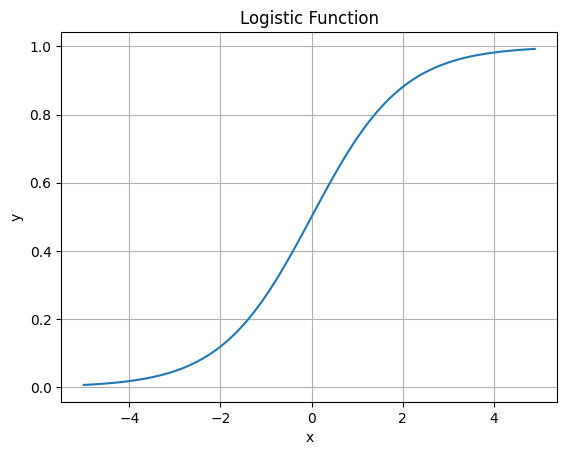

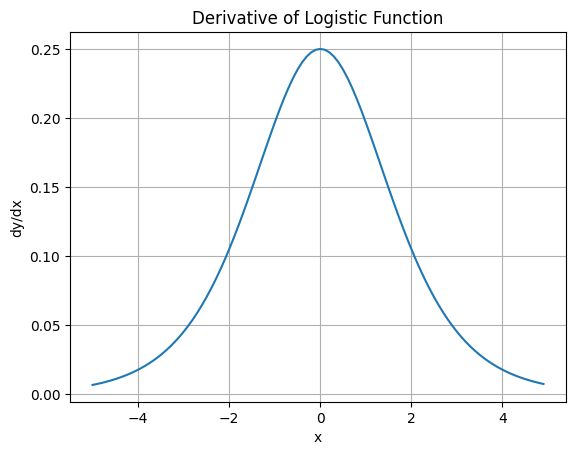

In [27]:
# Convert symbolic expression to numpy function
logistic_np      = sp.lambdify(x, logistic, modules=['numpy'])
logistic_deriv_np =  sp.lambdify(x, logistic_deriv, modules=['numpy'])

# Apply the function
x_vals = np.arange(-5,5,0.1)
y_vals = logistic_np(x_vals)
dydx_vals = logistic_deriv_np(x_vals)

plt.figure()
plt.plot(x_vals, y_vals)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Logistic Function")

plt.figure()
plt.plot(x_vals, dydx_vals)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("dy/dx")
plt.title("Derivative of Logistic Function")

# Logistic Regression Example

## Define the probabilistic classification function

In [28]:
x = sp.Matrix(sp.symbols('x1 x2'))   # feature vector
w = sp.Matrix(sp.symbols('w1 w2'))   # weight vector
b = sp.symbols('b')                  # bias scalar

pygx = 1 / (1 + sp.exp(-(w.dot(x) + b)))

display(pygx)

           1           
───────────────────────
 -b - w₁⋅x₁ - w₂⋅x₂    
ℯ                   + 1

## Define the nll

In [29]:
y = sp.symbols('y')
nll = y*sp.log(pygx) + (1-y)*sp.log(1-pygx)
display(nll)

     ⎛           1           ⎞              ⎛               1           ⎞
y⋅log⎜───────────────────────⎟ + (1 - y)⋅log⎜1 - ───────────────────────⎟
     ⎜ -b - w₁⋅x₁ - w₂⋅x₂    ⎟              ⎜     -b - w₁⋅x₁ - w₂⋅x₂    ⎟
     ⎝ℯ                   + 1⎠              ⎝    ℯ                   + 1⎠

## Get the gradient of the nll

In [30]:
# Create a Matrix containing the scalar function
scalar_matrix = sp.Matrix([nll])

# Calculate the gradient using jacobian
nll_gradient = sp.simplify(scalar_matrix.jacobian((w,b)))

display(nll_gradient)

⎡   ⎛   b + w₁⋅x₁ + w₂⋅x₂        b + w₁⋅x₁ + w₂⋅x₂⎞     ⎛   b + w₁⋅x₁ + w₂⋅x₂  ↪
⎢x₁⋅⎝y⋅ℯ                  + y - ℯ                 ⎠  x₂⋅⎝y⋅ℯ                   ↪
⎢──────────────────────────────────────────────────  ───────────────────────── ↪
⎢               b + w₁⋅x₁ + w₂⋅x₂                                   b + w₁⋅x₁  ↪
⎣              ℯ                  + 1                              ℯ           ↪

↪        b + w₁⋅x₁ + w₂⋅x₂⎞     b + w₁⋅x₁ + w₂⋅x₂        b + w₁⋅x₁ + w₂⋅x₂⎤
↪ + y - ℯ                 ⎠  y⋅ℯ                  + y - ℯ                 ⎥
↪ ─────────────────────────  ─────────────────────────────────────────────⎥
↪ + w₂⋅x₂                                b + w₁⋅x₁ + w₂⋅x₂                ⎥
↪         + 1                           ℯ                  + 1            ⎦

## Evaluate the nll gradient

In [37]:
grad_func = sp.lambdify((w, b, y, x), nll_gradient, modules=["numpy"])

x_val     = np.array([1,2]).T
y_val     = 1
w_val     = np.array([0.5,0.5])
b_val     = 1

print(grad_func(w_val,b_val,y_val,x_val))


TypeError: loop of ufunc does not support argument 0 of type Add which has no callable exp method